Read Data

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np

df = pd.read_csv('./Boston.csv')
print('Size of boston data frame is :',df.shape)
df.head()

Size of boston data frame is : (506, 15)


Unnamed: 0     crim    zn  indus  chas  ...  tax  ptratio   black  lstat  medv
0           1  0.00632  18.0   2.31     0  ...  296     15.3  396.90   4.98  24.0
1           2  0.02731   0.0   7.07     0  ...  242     17.8  396.90   9.14  21.6
2           3  0.02729   0.0   7.07     0  ...  242     17.8  392.83   4.03  34.7
3           4  0.03237   0.0   2.18     0  ...  222     18.7  394.63   2.94  33.4
4           5  0.06905   0.0   2.18     0  ...  222     18.7  396.90   5.33  36.2

[5 rows x 15 columns]

# Data Pruning
### 1. Deal with Nan & null values
Count null values

In [2]:
df.isna().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

Dropping first column as it is an index.

In [3]:
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

crim    zn  indus  chas    nox  ...  tax  ptratio   black  lstat  medv
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

No null values noted, So we need not prune anything here.

# Feature Scaling
Feature domination for eg:- Black might dominate temperature from above sample.
There are few scaling methods that can scale data reduce feature domination. 

1. Standard Scalar: scales features to 0 mean.
2. MinMax Scalar: scales to 0 to 1 range.
3. QuantileTransformer: Fits data onto a normal distribution and reduces the effects of outliers

Before, we proceed, it would be a good excercise to get some statistical analysis on features.

In [4]:
df.describe()

crim          zn       indus  ...       black       lstat        medv
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]

#### Inference :
It is clear from the std deviation that most of the data points are well surrounded around the mean except for zn column. Scaling techniques like MinMacScalar might accidently include the influence of outliers. Nonetheless, we experiment with  
1. Standard Scalar
2. Quantile Transformer

For simplicity, we first experiment with Quantile.

In [0]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()  # stnadard sclaer will scale some properties of one hot encoded data as well
#scaler = preprocessing.QuantileTransformer() #(ignore_implicit_zeros=True) if used on one-hot encoded
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)

### Scaled Data

In [6]:
df.iloc[0:10]

crim        zn     indus  ...     black     lstat      medv
0 -0.419782  0.284830 -1.287909  ...  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381  ...  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381  ...  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878  ...  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878  ...  0.441052 -1.026501  1.487503
5 -0.417044 -0.487722 -1.306878  ...  0.410571 -1.043322  0.671222
6 -0.410243  0.048772 -0.476654  ...  0.426798 -0.031268  0.039964
7 -0.403696  0.048772 -0.476654  ...  0.441052  0.910700  0.497082
8 -0.395935  0.048772 -0.476654  ...  0.328448  2.421774 -0.656595
9 -0.400729  0.048772 -0.476654  ...  0.329325  0.623344 -0.395385

[10 rows x 14 columns]

# Feature Selection
There are multitude of methods for feature selection.
1. Univariate feature selection (with mutual_info_regression)
2. Correlation co-efficient
3. PCA

### 1. Univariate feature selection (with mutual_info_regression)
Selecting top 5 features, we could choose more and try!

In [7]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
X = df.drop(labels=['nox'], axis=1)
y = df[['nox']]
selector = SelectKBest(mutual_info_regression, k=5)
selector.fit(X, y)
X_unv = selector.transform(X)
print("Top 5 columns")
print(X.columns[selector.get_support(indices=True)]) #top 5 columns
df_unv = pd.DataFrame(X_unv, columns=X.columns[selector.get_support(indices=True)])
df_unv.head()

Top 5 columns
Index(['indus', 'dis', 'rad', 'tax', 'ptratio'], dtype='object')


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


indus       dis       rad       tax   ptratio
0 -1.287909  0.140214 -0.982843 -0.666608 -1.459000
1 -0.593381  0.557160 -0.867883 -0.987329 -0.303094
2 -0.593381  0.557160 -0.867883 -0.987329 -0.303094
3 -1.306878  1.077737 -0.752922 -1.106115  0.113032
4 -1.306878  1.077737 -0.752922 -1.106115  0.113032

#### Obeservations
1. Our 5 top features are 'indus', 'dis', 'rad', 'tax', 'ptratio'

### 2. Correlation coeff.

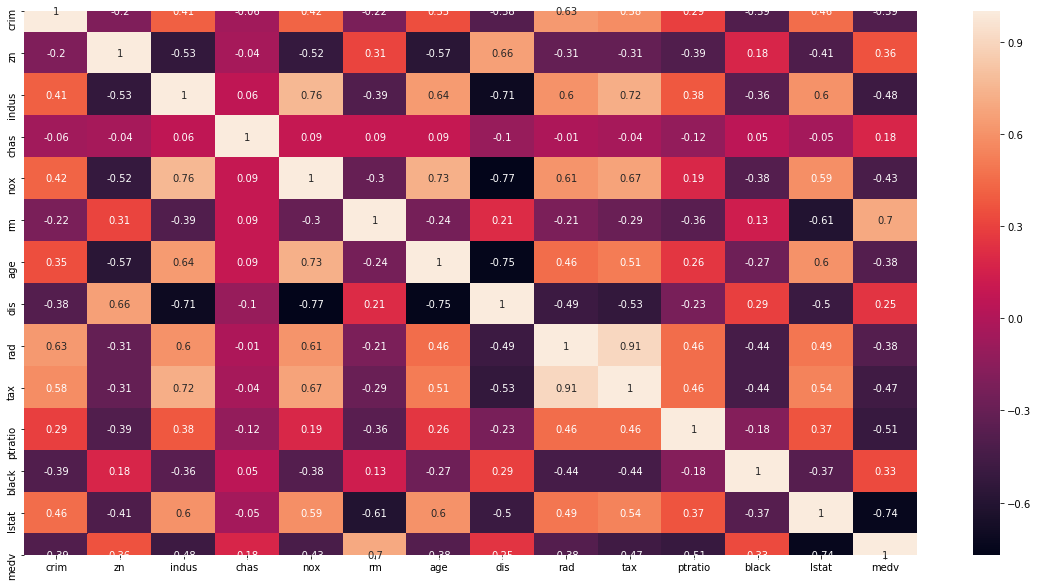

In [8]:
from matplotlib.pyplot import figure
import seaborn as sns 
boston_corr_mat = df.corr().round(2)
figure(figsize = (20,10))

sns.heatmap(data=boston_corr_mat, annot=True)

#### Observations:
1. Clearly lstat has -0.85 correlation, which could make it dominant feature.   
2. Only nox & age have highest correlations, hence we can choose any one of them.
3. nox and indus have higher correlations, so indus could be good indicator for nox

### 3. PCA Principal Component Analysis

In [9]:
from sklearn.decomposition import PCA
df.head()
X = df.drop(labels=['nox'], axis=1)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(pca.components_,columns=X.columns)
df_pca.head()

crim        zn     indus  ...     black     lstat      medv
0  0.260724 -0.256949  0.343924  ... -0.208985  0.332173 -0.291156
1 -0.001945 -0.173678  0.156705  ... -0.016909 -0.192254  0.447369
2  0.390715  0.421994 -0.084436  ... -0.359990 -0.148233  0.128257
3  0.102109  0.313281 -0.003349  ... -0.161522  0.219578 -0.168464
4  0.043163  0.067415 -0.008982  ... -0.477016  0.223208 -0.052304

[5 rows x 13 columns]

# Split into Train / Test data

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_unv,y,test_size=0.25)

## Training
1. Select models and apply hyper parameters.
2. Use ross validation (k-fold).
//explain
3. Use GridSearch CV
//explain

## Logistic Regression
### Train
About Hyper-Parameters
1. Trying both l1 & l2 regularization penalty
2. Balanced weights as classes are unbalanced

In [12]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

#poly_reg = PolynomialFeatures(degree = 2)
#X_train_reg_poly = poly_reg.fit_transform(X_train)
#X_test_reg_poly = poly_reg.fit_transform(X_test)

# try without polynomial features
X_train_reg_poly = X_train
X_test_reg_poly = X_test
# Hyper parameters

hyperparameters = dict(
    loss=['squared_loss', 'huber'],
    penalty=['l1', 'l2'],
    alpha=[0.1, 0.001, 0.0001, 0.00001],  # Regularization parameter
    learning_rate=['invscaling','optimal','adaptive'], 
    tol=[0.00001, 0.0000001 ],
    max_iter=[1000, 1000000])                   

#hyperparameters=dict()           # dry run

clf = GridSearchCV(SGDRegressor(), hyperparameters, cv=3, verbose=0)
best_model = clf.fit(X_train_reg_poly, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

#### Train and print best model

In [13]:
#best_model = clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(best_model.best_params_)

Best parameters set found on development set:

{'alpha': 0.1, 'learning_rate': 'optimal', 'loss': 'squared_loss', 'max_iter': 1000000, 'penalty': 'l2', 'tol': 1e-07}


### Test & F1 score, Accuracy

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = best_model.predict(X_test_reg_poly)
mse_lrm=mean_squared_error(y_test, y_pred)
r2_lrm=r2_score(y_test, y_pred)

print('Report :\n')
print('R2', r2_lrm)
print('MSE', mse_lrm)

Report :

R2 0.7189454296501433
MSE 0.2659250535481969


Standard Scalar significantly improves r2 of SGDRegressor, but doesnot do so for GradientBoostingRegressor.

## Decision Trees
### Train
About Hyper-Parameters


In [16]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

#poly_reg = PolynomialFeatures(degree = 3)
#X_train_reg_poly = poly_reg.fit_transform(X_train)
#X_test_reg_poly = poly_reg.fit_transform(X_test)

# try without polynomial features
X_train_reg_poly = X_train
X_test_reg_poly = X_test
# Hyper parameters

## Hyper parameters

hyperparameters = dict(
    loss=['ls', 'lad'],
    alpha=[0.001, 0.0001, 0.00001],  # Regularization parameter
    tol=[0.0001],
    max_depth=[3,5,7],
    min_impurity_split=[0.00001,0.0000001, 0.000000001])                   

#hyperparameters=dict()           # dry run

clf = GridSearchCV(GradientBoostingRegressor(), hyperparameters, cv=3, verbose=0)
best_model = clf.fit(X_train_reg_poly, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated.

### Train and print best model

In [17]:

print("Best parameters set found on development set:")
print()
print(best_model.best_params_)

Best parameters set found on development set:

{'alpha': 1e-05, 'loss': 'lad', 'max_depth': 5, 'min_impurity_split': 1e-05, 'tol': 0.0001}


### Test & F1 score, Accuracy

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = best_model.predict(X_test_reg_poly)
mse_lrm=mean_squared_error(y_test, y_pred)
r2_lrm=r2_score(y_test, y_pred)

print('Report :\n')
print('R2', r2_lrm)
print('MSE', mse_lrm)

Report :

R2 0.9083779946783015
MSE 0.08668987891225828


## Conclusion:
**d**